## Génération de figures pour le chapitre « Tests statistiques ».

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [65]:
plt.rc('font', **{'family':'sans', 'size': 20})

matplotlib.rcParams.update({
    'text.usetex': True,
    'text.latex.preamble': [r'\usepackage{mathptmx}',r'\usepackage{amsmath}', r'\usepackage{amssymb}',]})

In [32]:
prop_cycle = plt.rcParams['axes.prop_cycle']
def_colors = prop_cycle.by_key()['color']

In [3]:
import scipy.stats as st

### Z-score

In [24]:
xxx = np.linspace(-3, 3, 500)

In [25]:
y = st.norm.pdf(xxx, 0, 1.)

In [26]:
alpha = 0.05
z0 = st.norm.ppf((1 - alpha/2), 0., 1.) # inverse cumulative distribution function
print("z_0 = %.2f" % z0)

z_0 = 1.96


In [27]:
st.norm.cdf(1.96, 0, 1)

0.9750021048517795

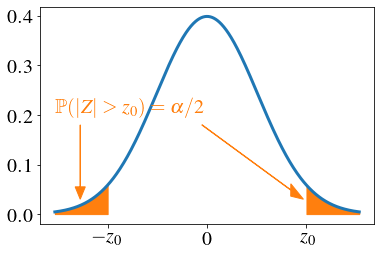

In [118]:
fig = plt.figure(figsize=(6, 4))

# Gaussian
plt.plot(xxx, y, lw=3, label=r'$Z$')

# Color space where |Z|>z0
xxx_l = np.linspace(-3, -z0, 20)
plt.fill_between(xxx_l, 0, st.norm.pdf(xxx_l, 0, 1.), color=def_colors[1])

xxx_r = np.linspace(z0, 3, 20)
plt.fill_between(xxx_r, 0, st.norm.pdf(xxx_r, 0, 1.), color=def_colors[1])

# Text and arrows
plt.text(-3., 0.2,  r'$\mathbb{P}(|Z| > z_0) = \alpha/2$', color=def_colors[1])
plt.arrow(-2.5, 0.18, 0, -0.15, color=def_colors[1], length_includes_head=True,
          head_width=0.2, head_length=0.025)
plt.arrow(-0.1, 0.18, 2, -0.15, color=def_colors[1], length_includes_head=True,
          head_width=0.025, head_length=0.25)

t = plt.xticks([-z0, 0, z0], [r'$-z_0$', '0', r'$z_0$'])
#t = plt.yticks([], [])
#plt.legend()
plt.savefig('../poly/figures/tests/z_moyenne.pdf', bbox_inches='tight')

### Pigeons 

In [297]:
n = 40
mn = 312
mu0 = 300
sighat = 31

In [298]:
Zobs = np.sqrt(n)*(mn - mu0)/sighat

In [299]:
print("z = %.2f" % Zobs)

z = 2.45


In [258]:
print("p-valeur = %.3f" % st.norm.cdf(-Zobs))

p-valeur = 0.018


In [142]:
print("%.2f" % st.norm.ppf((1 - 0.01/2), 0., 1.))

2.58


### Various significance levels

In [210]:
xxx = np.linspace(-3.5, 3.5, 500)

In [211]:
y = st.norm.pdf(xxx, 0, 1.)

In [290]:
alpha1 = 0.05
z1 = st.norm.ppf((1 - alpha1/2), 0., 1.) # inverse cumulative distribution function
print("z_1 = %.2f" % z1)

alpha2 = 0.01
z2 = st.norm.ppf((1 - alpha2/2), 0., 1.) # inverse cumulative distribution function
print("z_2 = %.2f" % z2)

z_1 = 1.96
z_2 = 2.58


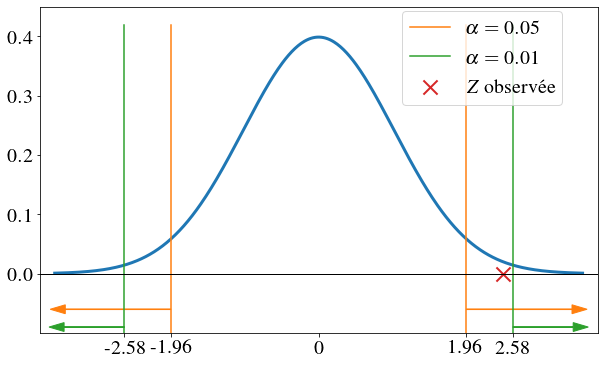

In [302]:
fig = plt.figure(figsize=(10, 6))

# Gaussian
plt.plot(xxx, y, lw=3)

# alpha1
plt.plot([-z1, -z1], [-0.1, 0.42], color=def_colors[1], 
         label=(r'$\alpha=%.2f$' % alpha1))
plt.plot([z1, z1], [-0.1, 0.42], color=def_colors[1])
plt.arrow(-z1, -0.06, -1.6, 0, color=def_colors[1], 
          length_includes_head=True,
          head_width=0.015, head_length=0.2)
plt.arrow(z1, -0.06, 1.6, 0, color=def_colors[1], 
          length_includes_head=True,
          head_width=0.015, head_length=0.2)

# alpha2
plt.plot([-z2, -z2], [-0.1, 0.42], color=def_colors[2], 
         label=(r'$\alpha=%.2f$' % alpha2))
plt.plot([z2, z2], [-0.1, 0.42], color=def_colors[2])
plt.arrow(-z2, -0.09, -1., 0, color=def_colors[2], 
          length_includes_head=True,
          head_width=0.015, head_length=0.2)
plt.arrow(z2, -0.09, 1., 0, color=def_colors[2], 
          length_includes_head=True,
          head_width=0.015, head_length=0.2)

# Observation
plt.scatter([Zobs], [0], s=200, color=def_colors[3], marker='x', 
            lw=2, label=r'$Z$ observée')

# Axes
t = plt.xticks([-z2, -z1, 0, z1, z2], 
               [("-%.2f" % z2), ("-%.2f" % z1), '0', ("%.2f" % z1), ("%.2f" % z2)])
t = plt.yticks(np.linspace(0., 0.4, 5))
plt.ylim(-0.1, 0.45)

plt.plot([-3.7, 3.7], [0., 0.], 'k', lw=1)
plt.xlim(-3.7, 3.7)

plt.legend(loc=(0.65, 0.7))

plt.savefig('../poly/figures/tests/z_pigeons.pdf', bbox_inches='tight')

### One-sided test

In [319]:
alpha1 = 0.05
z1r = - st.norm.ppf(alpha1, 0., 1.) # inverse cumulative distribution function
print("z_1 = %.2f" % z1r)

alpha2 = 0.01
z2r = - st.norm.ppf(alpha2, 0., 1.) # inverse cumulative distribution function
print("z_2 = %.2f" % z2r)

z_1 = 1.64
z_2 = 2.33


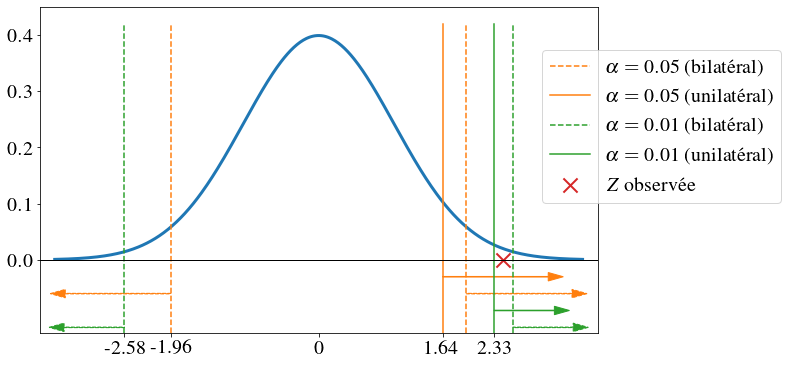

In [335]:
fig = plt.figure(figsize=(10, 6))

# Gaussian
plt.plot(xxx, y, lw=3)

# alpha1
plt.plot([-z1, -z1], [-0.13, 0.42], color=def_colors[1], 
         label=(r'$\alpha=%.2f$ (bilatéral)' % alpha1), ls='--')
plt.plot([z1, z1], [-0.13, 0.42], color=def_colors[1], ls='--')
plt.arrow(-z1, -0.06, -1.6, 0, color=def_colors[1], 
          length_includes_head=True,
          head_width=0.015, head_length=0.2, ls='--')
plt.arrow(z1, -0.06, 1.6, 0, color=def_colors[1], length_includes_head=True,
          head_width=0.015, head_length=0.2, ls='--')

# alpha1 unilatéral à droite
plt.plot([z1r, z1r], [-0.13, 0.42], color=def_colors[1], 
         label=(r'$\alpha=%.2f$ (unilatéral)' % alpha1))
plt.arrow(z1r, -0.03, 1.6, 0, color=def_colors[1], length_includes_head=True,
          head_width=0.015, head_length=0.2)


# alpha2
plt.plot([-z2, -z2], [-0.13, 0.42], color=def_colors[2], 
         label=(r'$\alpha=%.2f$  (bilatéral)' % alpha2), ls='--')
plt.plot([z2, z2], [-0.13, 0.42], color=def_colors[2], ls='--')
plt.arrow(-z2, -0.12, -1., 0, color=def_colors[2], 
          length_includes_head=True,
          head_width=0.015, head_length=0.2, ls='--')
plt.arrow(z2, -0.12, 1., 0, color=def_colors[2], 
          length_includes_head=True,
          head_width=0.015, head_length=0.2, ls='--')

# alpha2 unilatéral à droite 
plt.plot([z2r, z2r], [-0.13, 0.42], color=def_colors[2], 
         label=(r'$\alpha=%.2f$ (unilatéral)' % alpha2))
plt.arrow(z2r, -0.09, 1., 0, color=def_colors[2], 
          length_includes_head=True,
          head_width=0.015, head_length=0.2)


# Observation
plt.scatter([Zobs], [0], s=200, color=def_colors[3], marker='x', 
            lw=2, label=r'$Z$ observée')

# Axes
t = plt.xticks([-z2, -z1, 0, z1r, z2r], 
               [("-%.2f" % z2), ("-%.2f" % z1), '0', ("%.2f" % z1r), ("%.2f" % z2r)])
t = plt.yticks(np.linspace(0., 0.4, 5))
plt.ylim(-0.13, 0.45)

plt.plot([-3.7, 3.7], [0., 0.], 'k', lw=1)
plt.xlim(-3.7, 3.7)

plt.legend(loc=(0.9, 0.4))

plt.savefig('../poly/figures/tests/z_pigeons_unilateral.pdf', bbox_inches='tight')

### Intervalles de confiance 

In [352]:
print("IC à %.0f%% : [%.1f, %.1f]" % ((100*(1-alpha1)), (mn - sighat*z1/np.sqrt(n)), (mn + sighat*z1/np.sqrt(n))))

IC à 95% : [302.4, 321.6]


In [353]:
print("IC à %.0f%% : [%.1f, %.1f]" % ((100*(1-alpha2)), (mn - sighat*z2/np.sqrt(n)), (mn + sighat*z2/np.sqrt(n))))

IC à 99% : [299.4, 324.6]


In [354]:
7./25

0.28

In [355]:
0.3*25

7.5